# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, plotly.express as px, matplotlib.ticker as ticker, scipy.stats as st, sklearn.linear_model as sk, datetime as dt
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip
pd.options.mode.copy_on_write = True

In [2]:
#On importe les données dans un dataframe
df_historique = pd.read_excel('historique_immobilier_paris_2017_2021_vdef2.xlsx')

Attention, si l'opération ci-dessus ne marche pas, il se peut que le package "openpyxl" ne soit pas présent sur votre ordinateur. Si c'est le cas vous pouvez l'installer en éxécutant la commande : pip install openpyxl ou conda install openpyxl.

In [3]:
#On vérifie que le type des données attribué par pandas est cohérent
df_historique.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [4]:
#On cherche quel sont les type de biens présents dans le dataframe ainsi que le code associé
type_histo=df_historique.value_counts('type_local')
print(f"Les types de biens dans notre fichier historique :{type_histo}")


Les types de biens dans notre fichier historique :type_local
Appartement                                 24353
Local industriel. commercial ou assimilé     1843
Name: count, dtype: int64


On observe qu'il y a 2 types de biens, et que leurs codes types sont 2 pour les type Appartements et 4 pour les types Local industriel, commercial ou assimilé. 

### 3. Nombre de transactions

In [5]:
#On verifie le nombre de transactions que nous avons dans notre dataframe

print("Le nombre de transactions dans les données est",len(df_historique.index))
appartement = df_historique.apply(lambda x: True if x['type_local'] == 'Appartement' else False, axis=1)
transaction_appartement = len(appartement[appartement==True].index)
print(f"Le nombre de transactions pour les appartements dans les données est {transaction_appartement}")
locaux = df_historique.apply(lambda x: True if x['type_local'] == 'Local industriel. commercial ou assimilé' else False, axis=1)
transaction_locaux = len(locaux[locaux==True].index)
print(f"Le nombre de transactions pour les locaux commerciaux dans les données est {transaction_locaux}")

Le nombre de transactions dans les données est 26196
Le nombre de transactions pour les appartements dans les données est 24353
Le nombre de transactions pour les locaux commerciaux dans les données est 1843


### 4. interval de l'historique des données

In [6]:
#On vérifie également la plage de l'historique disponible
print("La première date de transaction dans les données est le {} ".format(df_historique['date_mutation'].min()))
print("La dernière date de transaction dans les données est le {} ".format(df_historique['date_mutation'].max()))

La première date de transaction dans les données est le 2017-01-02 00:00:00 
La dernière date de transaction dans les données est le 2021-12-31 00:00:00 


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [7]:
# Calcul de la colonne
df_historique['prix_m2'] = round(df_historique['valeur_fonciere'] / df_historique['surface_reelle'],2)
df_historique.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
0,2017-01-03,5.505597e+05,8,RUE DES COUTURES SAINT GERVAIS,75003,Paris 3e Arrondissement,2,Appartement,50,11011.19
1,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.73
2,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.02
3,2017-01-10,2.500868e+05,64,RUE DU VERTBOIS,75003,Paris 3e Arrondissement,2,Appartement,22,11367.58
4,2017-01-13,1.762667e+05,25,RUE DES LAVANDIERES STE OPPORT,75001,Paris 1er Arrondissement,2,Appartement,15,11751.11


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [8]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
df_appartement = df_historique[df_historique['type_local']=='Appartement']
df_appartement['Annee'] = df_appartement['date_mutation'].dt.year
df_appartement.drop(['adresse_numero','adresse_nom_voie','nom_commune','code_type_local'],axis=1,inplace=True)
display(df_appartement)

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_m2,Annee
0,2017-01-03,5.505597e+05,75003,Appartement,50,11011.19,2017
1,2017-01-12,1.576492e+06,75008,Appartement,163,9671.73,2017
2,2017-01-10,6.577574e+05,75008,Appartement,66,9966.02,2017
3,2017-01-10,2.500868e+05,75003,Appartement,22,11367.58,2017
4,2017-01-13,1.762667e+05,75001,Appartement,15,11751.11,2017
...,...,...,...,...,...,...,...
26189,2021-02-24,8.489150e+05,75004,Appartement,66,12862.35,2021
26191,2021-02-25,4.712239e+05,75004,Appartement,37,12735.78,2021
26193,2021-03-08,3.124359e+05,75002,Appartement,26,12016.77,2021
26194,2021-03-11,1.562234e+05,75002,Appartement,13,12017.18,2021


In [9]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
df_all_appart = pd.DataFrame(
    round(df_appartement.groupby('Annee').mean('prix_m2'),2),
    columns=['valeur_fonciere','surface_reelle','prix_m2']
)
display(df_all_appart)

,valeur_fonciere,surface_reelle,prix_m2
Annee,,,
2017,427963.24,44.63,9492.86
2018,448055.76,44.27,10031.40
2019,461950.06,43.36,10562.71
2020,462383.25,42.90,10674.87
2021,458771.51,43.48,10455.60


On constate sur la moyenne des prix de vente des appartements à Paris que le prix du m2 a augmenté au fil des années avec un pic en 2020 puis a connu une baisse en 2021 <br>
Nous allons créer un graphique pour mieux le visualiser.

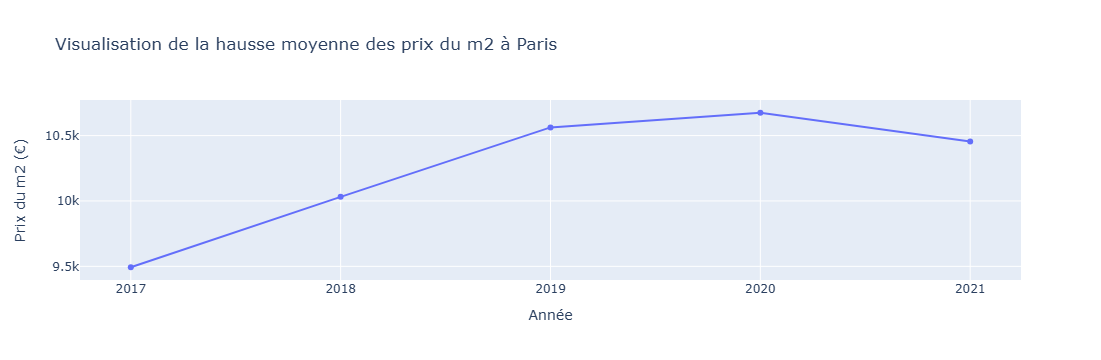

In [10]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
liste_annee = ['2017','2018','2019','2020','2021']
fig1 = px.line(
    df_all_appart,
      x=liste_annee,
        y='prix_m2',
        title='Visualisation de la hausse moyenne des prix du m2 à Paris',
        markers=True,
        labels={'x':'Année','prix_m2':'Prix du m2 (€)'}
        )
fig1.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [11]:
#Liste des codes postaux dans nos données.
listing_cp = df_appartement['code_postal'].unique()
print(listing_cp)


[75003 75008 75001 75006 75005 75007 75010 75009 75011 75012 75013 75014
 75015 75016 75017 75018 75020 75019 75004 75002]


In [12]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
df_evolution_all = round(df_appartement.pivot_table(index='Annee',columns='code_postal',values=['prix_m2']),2)
display(df_evolution_all)

prix_m2                                                    \
code_postal     75001     75002     75003     75004     75005     75006   
Annee                                                                     
2017         11762.71  10920.13  11679.82  12407.23  11306.75  12508.84   
2018         12621.23  11309.46  12470.00  13431.89  12056.44  12896.28   
2019         13269.26  12150.54  12813.40  13641.49  12928.38  13378.07   
2020         13405.99  12181.59  12834.31  13104.74  12959.76  13807.09   
2021         13379.50  11773.45  12660.55  12936.96  12605.84  13795.05   

                                                                        \
code_postal     75007     75008     75009     75010     75011    75012   
Annee                                                                    
2017         11845.12  10132.80   9582.31   8747.00   9137.78  8454.85   
2018         12553.18  10631.30  10187.21   9328.03   9688.95  8937.73   
2019         12921.89  11195.45  10957.78   9999.13  10376.91  9497.68   
2020         13109.83  11702.93  10981.24  10200.33  10533.07  9691.11   
2021         13118.14  11710.09  10732.18  10043.47  10351.64  9657.98   

                                                                       \
code_postal    75013     75014     75015     75016     75017    75018   
Annee                                                                   
2017         8344.89   9054.81   9097.89   9808.82   9336.87  8466.30   
2018         8755.22   9433.54   9328.04  10244.44   9880.66  9152.93   
2019         9340.37  10027.17   9822.11  10825.03  10399.61  9928.34   
2020         9333.90  10107.80  10061.24  10911.14  10536.29  9946.89   
2021         9164.63   9993.62   9971.24  10790.31  10372.37  9665.64   

                               
code_postal    75019    75020  
Annee                          
2017         7621.76  7886.02  
2018         8265.86  8485.16  
2019         8850.26  9093.99  
2020         8982.62  9329.31  
2021         8828.59  9114.40

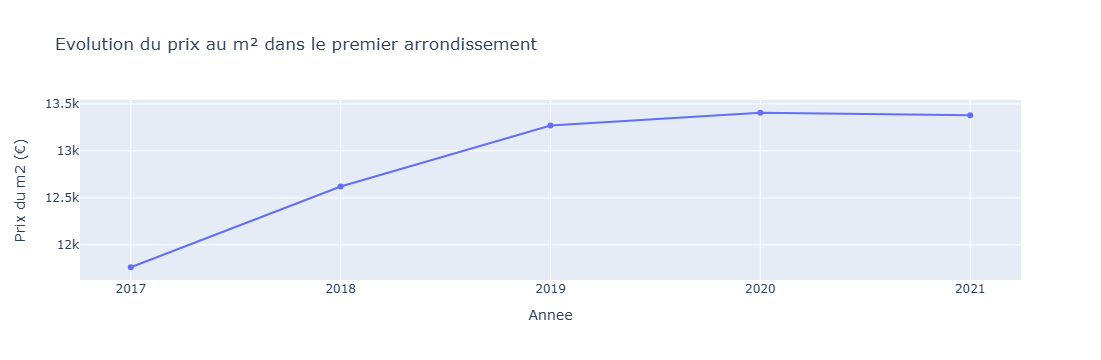

In [13]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix au metre carré dans le premier arrondissement
prix_1A = (df_evolution_all.iloc[0:5,0]).to_list()
Annee = liste_annee
fig2 = px.line(df_evolution_all,
                x=Annee,
                  y=prix_1A,
                  title='Evolution du prix au m² dans le premier arrondissement',
                  markers=True,
                  labels={'x':'Annee','y':'Prix du m2 (€)'}
                          )
fig2.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

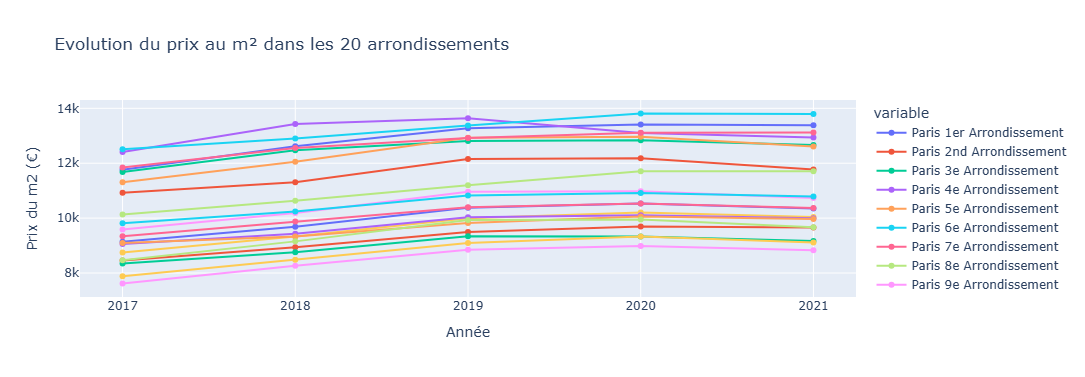

In [14]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
prix_2A = (df_evolution_all.iloc[0:5,1]).to_list()
prix_3A = (df_evolution_all.iloc[0:5,2]).to_list()
prix_4A = (df_evolution_all.iloc[0:5,3]).to_list()
prix_5A = (df_evolution_all.iloc[0:5,4]).to_list()
prix_6A = (df_evolution_all.iloc[0:5,5]).to_list()
prix_7A = (df_evolution_all.iloc[0:5,6]).to_list()
prix_8A = (df_evolution_all.iloc[0:5,7]).to_list()
prix_9A = (df_evolution_all.iloc[0:5,8]).to_list()
prix_10A = (df_evolution_all.iloc[0:5,9]).to_list()
prix_11A = (df_evolution_all.iloc[0:5,10]).to_list()
prix_12A = (df_evolution_all.iloc[0:5,11]).to_list()
prix_13A = (df_evolution_all.iloc[0:5,12]).to_list()
prix_14A = (df_evolution_all.iloc[0:5,13]).to_list()
prix_15A = (df_evolution_all.iloc[0:5,14]).to_list()
prix_16A = (df_evolution_all.iloc[0:5,15]).to_list()
prix_17A = (df_evolution_all.iloc[0:5,16]).to_list()
prix_18A = (df_evolution_all.iloc[0:5,17]).to_list()
prix_19A = (df_evolution_all.iloc[0:5,18]).to_list()
prix_20A = (df_evolution_all.iloc[0:5,19]).to_list()


fig3 = px.line(df_evolution_all, 
               x=liste_annee, 
               y=[prix_1A,prix_2A,prix_3A,prix_4A,prix_5A,prix_6A,prix_7A,prix_8A,prix_9A,prix_10A,prix_11A,prix_12A,prix_13A,prix_14A,prix_15A,prix_16A,prix_17A,prix_18A,prix_19A,prix_20A],
               title='Evolution du prix au m² dans les 20 arrondissements',
               markers=True,
               labels={'x':'Année','value':'Prix du m2 (€)'}
               )
newnames = {'wide_variable_0':'Paris 1er Arrondissement',
            'wide_variable_1': 'Paris 2nd Arrondissement',
            'wide_variable_2': 'Paris 3e Arrondissement',
            'wide_variable_3': 'Paris 4e Arrondissement',
            'wide_variable_4': 'Paris 5e Arrondissement',
            'wide_variable_5': 'Paris 6e Arrondissement',
            'wide_variable_6': 'Paris 7e Arrondissement',
            'wide_variable_7': 'Paris 8e Arrondissement',
            'wide_variable_8': 'Paris 9e Arrondissement',
            'wide_variable_9': 'Paris 10e Arrondissement',
            'wide_variable_10': 'Paris 11e Arrondissement',
            'wide_variable_11': 'Paris 12e Arrondissement',
            'wide_variable_12': 'Paris 13e Arrondissement',
            'wide_variable_13': 'Paris 14e Arrondissement',
            'wide_variable_14':'Paris 15e Arrondissement',
            'wide_variable_15': 'Paris 16e Arrondissement',
            'wide_variable_16': 'Paris 17e Arrondissement',
            'wide_variable_17': 'Paris 18e Arrondissement',
            'wide_variable_18': 'Paris 19e Arrondissement',
            'wide_variable_19': 'Paris 20e Arrondissement'
            }
fig3.for_each_trace(lambda t: t.update(name = newnames[t.name], legendgroup = newnames[t.name], 
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
fig3.show()

On observe que globalement que le prix du m2 a augmenté pour l'ensemble des arrondissements jusqu'à atteindre un pic en 2020 puis se stabilise voir même diminue pour certains arrondissements.

### 7. Prix au metre carré par transaction dans un arrondissement

In [15]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
df_transac_sixieme = df_appartement[df_appartement['code_postal']== 75006]
display(df_transac_sixieme)
liste_transaction = df_transac_sixieme.value_counts('Annee')
print()
print("Nombre de transaction par année dans le 6ème arrondissement:")
print(liste_transaction)

,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle,prix_m2,Annee
478,2017-01-10,9.601314e+05,75006,Appartement,78,12309.38,2017
482,2017-01-13,8.204362e+05,75006,Appartement,68,12065.24,2017
484,2017-01-13,1.796112e+06,75006,Appartement,143,12560.22,2017
488,2017-01-17,2.488198e+05,75006,Appartement,20,12440.99,2017
491,2017-01-19,4.828724e+05,75006,Appartement,40,12071.81,2017
...,...,...,...,...,...,...,...
24915,2021-12-22,1.360988e+06,75006,Appartement,97,14030.80,2021
24953,2021-12-16,9.705679e+05,75006,Appartement,72,13480.11,2021
24956,2021-12-27,2.525194e+05,75006,Appartement,18,14028.86,2021
25013,2021-12-24,6.051571e+05,75006,Appartement,44,13753.57,2021



Nombre de transaction par année dans le 6ème arrondissement:
Annee
2017    198
2018    175
2019    123
2020    108
2021    105
Name: count, dtype: int64


On constate que le nombre de transaction a diminué en avançant dans le temps.

Affichons l'historique des transactions pour visualiser la dispersion des données :

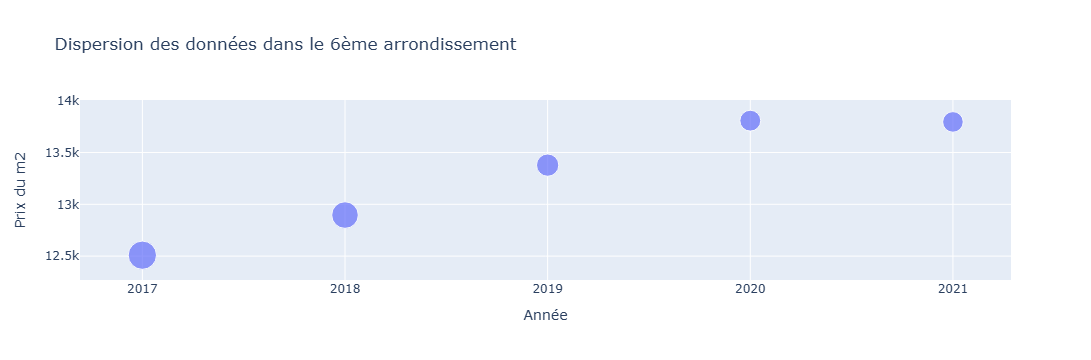

In [16]:
transaction_6 = df_transac_sixieme.value_counts('Annee').to_list()
prix_m2_6 = (df_evolution_all.iloc[0:5,5]).to_list()


fig4 = px.scatter(df_transac_sixieme,
                  x=liste_annee,
                  y=prix_m2_6,
                  size=transaction_6,
                  labels={'x':'Année','y':'Prix du m2','size':'Nombres de transactions'},
                  title='Dispersion des données dans le 6ème arrondissement'
                  )
fig4.show()

On observe que le nombre de transactions a tendance à diminuer au fil des ans contrairement au prix du m2 qui lui, a tendance à augmenter.

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

In [17]:
#On calcule la corrélation de Pearson
from scipy import stats
df_test_correlation = round(df_transac_sixieme.groupby('Annee').mean('valeur_fonciere'),2)
df_test_correlation = df_test_correlation.rename_axis('Annee').reset_index()
df_test_correlation['nombre_transaction'] = transaction_6
display(df_test_correlation)
print()
coef_corr = round(st.pearsonr(df_test_correlation['Annee'],df_test_correlation['prix_m2'])[0],2)
val_p = st.ttest_ind(df_test_correlation['Annee'],df_test_correlation['prix_m2']).pvalue
print(f"Le coefficient de corrélation : {coef_corr}.")
print("Celui ci étant proche de 1 il confirme une forte corrélation entre nos deux variables. Etant positif, il indique que lorsque l'une de nos deux variables augmente, l'autre tend à faire de même .")
print(f"La valeur p (pvalue)est de {val_p},")

,Annee,valeur_fonciere,code_postal,surface_reelle,prix_m2,nombre_transaction
0,2017,582541.65,75006.0,46.62,12508.84,198
1,2018,690174.51,75006.0,53.75,12896.28,175
2,2019,677444.41,75006.0,50.63,13378.07,123
3,2020,755259.93,75006.0,54.67,13807.09,108
4,2021,709572.17,75006.0,51.34,13795.05,105



Le coefficient de corrélation : 0.97.
Celui ci étant proche de 1 il confirme une forte corrélation entre nos deux variables. Etant positif, il indique que lorsque l'une de nos deux variables augmente, l'autre tend à faire de même .
La valeur p (pvalue)est de 7.50885250540423e-11,


Le coefficient de corrélation est de 0,97 avec une pvalue de 7e-11 donc nous pouvons confirmer la corrélation.

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [18]:
coef_corr1 = round(st.pearsonr(df_test_correlation['surface_reelle'],df_test_correlation['valeur_fonciere'])[0],2)
val_p1 = st.ttest_ind(df_test_correlation['surface_reelle'],df_test_correlation['valeur_fonciere']).pvalue
print(f"Le coefficient de corrélation : {coef_corr1}.")
print("Celui ci étant proche de 1 et positif, il confirme une forte corrélation entre nos deux variables ainsi que le fait que lorsqu'une des deux variables augmente, l'autre a tendance à augmenter également.")
print(f"La valeur p (pvalue)est de {val_p1},")

Le coefficient de corrélation : 0.92.
Celui ci étant proche de 1 et positif, il confirme une forte corrélation entre nos deux variables ainsi que le fait que lorsqu'une des deux variables augmente, l'autre a tendance à augmenter également.
La valeur p (pvalue)est de 9.463551948605813e-09,


Le coefficient de corrélation est de 0,92 avec une pvalue de 9e-9. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [19]:
#On crée un dataset qui ne contient que les locaux commerciaux
df_locaux = df_historique[df_historique['type_local']=='Local industriel. commercial ou assimilé']
display(df_locaux)

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,prix_m2
18,2017-02-01,3.113277e+06,65,RUE DE TURBIGO,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,250,12453.11
29,2017-02-17,1.164375e+06,17,RUE DU PONT AUX CHOUX,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,95,12256.58
34,2017-02-20,3.802522e+05,10,RUE CAFFARELLI,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,31,12266.20
91,2017-03-09,3.623842e+05,33,RUE DE RICHELIEU,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.01
109,2017-03-29,3.159072e+05,130,RUE VIEILLE DU TEMPLE,75003,Paris 3e Arrondissement,4,Local industriel. commercial ou assimilé,25,12636.29
...,...,...,...,...,...,...,...,...,...,...
26149,2021-01-13,1.903438e+05,3,RUE SAINT-JOSEPH,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,15,12689.58
26164,2021-01-26,4.487582e+05,2,RUE GRETRY,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,35,12821.66
26166,2021-01-13,6.409217e+05,115,RUE D ABOUKIR,75002,Paris 2e Arrondissement,4,Local industriel. commercial ou assimilé,49,13080.03
26190,2021-02-26,5.131939e+05,16,RUE AUBRIOT,75004,Paris 4e Arrondissement,4,Local industriel. commercial ou assimilé,37,13870.11


In [20]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année
df_locaux['Annee'] = df_locaux['date_mutation'].dt.year
df_moyenne_locaux = round(df_locaux.groupby('Annee').mean('prix_m2'),2)
df_moyenne_locaux.drop(['adresse_numero','code_postal','code_type_local'],axis=1,inplace=True)
df_moyenne_locaux = df_moyenne_locaux.rename_axis('Annee').reset_index()
display(df_moyenne_locaux)

,Annee,valeur_fonciere,surface_reelle,prix_m2
0,2017,965459.45,89.99,10949.91
1,2018,1003463.18,88.10,11569.50
2,2019,992822.16,82.83,11960.13
3,2020,1034380.46,85.63,11966.47
4,2021,1129357.18,92.83,12006.49


In [21]:
prix_m2_appartement = df_all_appart['prix_m2'].to_list()
prix_m2_locaux = df_moyenne_locaux['prix_m2'].to_list()
fig4 = px.line(df_moyenne_locaux, 
               x=liste_annee, 
               y=[prix_m2_appartement,prix_m2_locaux],
               title="Comparaison de l'évolution des prix au metre carré entre nos types de biens",
               markers=True,
               labels={'x':'Annee','value':'Prix du m2 (€)'}
               )
newnames2 = {'wide_variable_0':'Appartements',
            'wide_variable_1': 'Locaux'}
fig4.for_each_trace(lambda t: t.update(name = newnames2[t.name], legendgroup = newnames2[t.name], 
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames2[t.name])))
fig4.show()

Le prix au metre carré des locaux commerciaux est supérieur à celui des appartements.

Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df_train = df_historique
df_train['Annee'] = df_train['date_mutation'].dt.year
df_train = pd.get_dummies(df_train, columns=['code_postal','type_local', ])
df_train.drop(['adresse_numero','adresse_nom_voie','nom_commune','code_type_local'],axis=1,inplace=True)
df_train.head()

,date_mutation,valeur_fonciere,surface_reelle,prix_m2,Annee,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,2017-01-03,5.505597e+05,50,11011.19,2017,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2017-01-12,1.576492e+06,163,9671.73,2017,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2017-01-10,6.577574e+05,66,9966.02,2017,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2017-01-10,2.500868e+05,22,11367.58,2017,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2017-01-13,1.762667e+05,15,11751.11,2017,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [23]:
# On sépare le jeu de données entre echantillons d'apprentissage et de test 
# La valeur y à trouver est la valeur foncière
reg = LinearRegression()
X = df_train[
    ['surface_reelle',
     'Annee',
     'code_postal_75001',
     'code_postal_75002',
     'code_postal_75003',
     'code_postal_75004',
     'code_postal_75005',
     'code_postal_75006',
     'code_postal_75007',
     'code_postal_75008',
     'code_postal_75009',
     'code_postal_75010',
     'code_postal_75011',
     'code_postal_75012',
     'code_postal_75013',
     'code_postal_75014',
     'code_postal_75015',
     'code_postal_75016',
     'code_postal_75017',
     'code_postal_75018',
     'code_postal_75019',
     'code_postal_75020',
     'type_local_Appartement',
     'type_local_Local industriel. commercial ou assimilé']
     ]
y = df_train['valeur_fonciere']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=100)



In [24]:
#On entraîne l'algorithme ci-dessous et on effectue la prédiction
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
#Score quadratique moyen:
print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")
#Score erreur absolue moyenne:
print(f"MAE: {mean_absolute_error(y_test, y_pred_test)}")
#Score erreur absolue en %
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")
#Coefficient de détermination
print(f"R^2 : {np.round(reg.score(X, y), 3)}")


RMSE: 3991111970.3095574
MAE: 33650.36299979942
MAPE: 0.09227448026320552
R^2 : 0.982


In [25]:
reg.predict([[15, 2017, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        True, False, False, True, False]])

C:\Users\Lemairc1\MyApps\python-3.x.x-embed-amd64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([87265.33425531])

In [26]:
X.head(1).values

array([[50, 2017, False, False, True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, True, False]], dtype=object)

In [27]:
X_test.head(1).values

array([[15, 2020, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        True, False, False, True, False]], dtype=object)


Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- Nos prédicteurs sont fiables avec un score de R^2 à 0.98 (plus nous sommes proche de 1, meilleure est la qualité de nos prédicteurs)
- Notre algorithme retourne un score d'erreur absolue % de 0.09, il y a donc 9% en moyenne d'erreurs commises sur la prédiction de la valeur foncière.
- Nos prédicteurs ne sont peut être pas tous les éléments qui déterminent la valeur foncière. Il serait intéressant de lister ces derniers, les collecter et de les intégrer dans nos données pour les utiliser dans notre algorithme afin de réduire encore la marge d'erreur.

# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [28]:
#On importe les données dans un dataframe
df_actifs = pd.read_excel('portefeuille_actifs+(3).xlsx')
df_actifs.info()
df_pred = df_actifs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   adresse_numero             275 non-null    int64  
 1   adresse_nom_voie           275 non-null    object 
 2   code_postal                275 non-null    int64  
 3   code_commune               275 non-null    int64  
 4   nom_commune                275 non-null    object 
 5   surface_carrez             275 non-null    float64
 6   code_type_local            275 non-null    int64  
 7   type_local                 275 non-null    object 
 8   surface_reelle_bati        275 non-null    int64  
 9   nombre_pieces_principales  275 non-null    int64  
 10  longitude                  275 non-null    float64
 11  latitude                   275 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 25.9+ KB


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [29]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles
df_pred = pd.get_dummies(df_pred, columns=['code_postal', ])
df_pred = pd.get_dummies(df_pred, columns=['type_local', ])
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
df_pred['date_mutation'] = "31-12-2022"
df_pred['date_mutation'] = pd.to_datetime(df_pred.date_mutation)
df_pred['Annee'] = df_pred['date_mutation'].dt.year
df_pred['surface_reelle'] = df_pred['surface_reelle_bati']
df_pred.drop(['adresse_numero','adresse_nom_voie','code_commune','nom_commune','surface_carrez','nombre_pieces_principales','longitude','latitude','code_type_local','surface_reelle_bati','date_mutation'],axis=1,inplace=True)
df_pred.head()
df_pred[['surface_reelle',
     'Annee',
     'code_postal_75001',
     'code_postal_75002',
     'code_postal_75003',
     'code_postal_75004',
     'code_postal_75005',
     'code_postal_75006',
     'code_postal_75007',
     'code_postal_75008',
     'code_postal_75009',
     'code_postal_75010',
     'code_postal_75011',
     'code_postal_75012',
     'code_postal_75013',
     'code_postal_75014',
     'code_postal_75015',
     'code_postal_75016',
     'code_postal_75017',
     'code_postal_75018',
     'code_postal_75019',
     'code_postal_75020',
     'type_local_Appartement',
     'type_local_Local industriel. commercial ou assimilé']]


C:\Users\Lemairc1\AppData\Local\Temp\ipykernel_800\3052065873.py:7: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,surface_reelle,Annee,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,25,2022,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,22,2022,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,65,2022,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,2022,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,22,2022,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,2022,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
271,15,2022,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
272,35,2022,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
273,49,2022,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [30]:
X2 = df_pred[
    ['surface_reelle',
     'Annee',
     'code_postal_75001',
     'code_postal_75002',
     'code_postal_75003',
     'code_postal_75004',
     'code_postal_75005',
     'code_postal_75006',
     'code_postal_75007',
     'code_postal_75008',
     'code_postal_75009',
     'code_postal_75010',
     'code_postal_75011',
     'code_postal_75012',
     'code_postal_75013',
     'code_postal_75014',
     'code_postal_75015',
     'code_postal_75016',
     'code_postal_75017',
     'code_postal_75018',
     'code_postal_75019',
     'code_postal_75020',
     'type_local_Appartement',
     'type_local_Local industriel. commercial ou assimilé']
     ]
#On effectue la prédiction
valeur_pred = reg.predict(X2)
df_actifs['Valeur_fonciere_pred'] = valeur_pred
#On vérifie les 10 premières valeurs
df_actifs['Valeur_fonciere_pred'] = round(df_actifs['Valeur_fonciere_pred'],2)
df_actifs.head(10)

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,Valeur_fonciere_pred
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227,426702.80
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907,365698.81
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318,814498.69
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893,874733.77
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490,331999.03
5,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,33.40,2,Appartement,35,1,2.311643,48.875490,467682.71
6,52,RUE DES GRAVILLIERS,75003,75103,Paris 3e Arrondissement,21.35,2,Appartement,24,2,2.355637,48.864366,386573.22
7,208,RUE SAINT MAUR,75010,75110,Paris 10e Arrondissement,54.69,2,Appartement,60,3,2.371885,48.873209,635675.52
8,142,RUE DE COURCELLES,75017,75117,Paris 17e Arrondissement,9.30,2,Appartement,11,1,2.300373,48.882505,143176.69
9,52,RUE LAMARCK,75018,75118,Paris 18e Arrondissement,12.88,2,Appartement,13,1,2.342134,48.889431,142545.47


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [31]:
#Valorisation du portefeuille sur le segment des particuliers
df_valo_appartement = df_actifs[df_actifs['type_local']=='Appartement']
valo_particulier = df_valo_appartement['Valeur_fonciere_pred'].sum()
print(f"La valorisation du segment particulier prédite est de {valo_particulier} euros.")


La valorisation du segment particulier prédite est de 70452259.69 euros.


In [32]:
#Valorisation du portefeuille sur le segment corporate
df_valo_corpo = df_actifs[df_actifs['type_local']=='Local industriel. commercial ou assimilé']
valo_corpo = df_valo_corpo['Valeur_fonciere_pred'].sum()
print(f"La valorisation du segment corporate prédite est de {valo_corpo} euros.")


La valorisation du segment corporate prédite est de 98562887.86 euros.


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- Le segment des locaux commerciaux a une meilleure valorisation que le segment des appartements. Cela s'explique par le prix du m2 plus fort pour ce type de bien (voir nos analyses précedentes) et du fait qu'il y a quasiment le même nombres de type de biens dans notre portefeuille (154 appartements et 121 locaux). 
- Cette estimation ne se base que sur la valorisation des biens, la prise de décision devra tenir compte également du marché (nbr de demande / type de biens par exemple)

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [33]:
#On importe les données dans un dataframe
df_classification = pd.read_excel('echantillon_a_classer2.xlsx')
df_classification.head()


,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.083271,75019,Paris 19e Arrondissement,88
1,452050.762192,75019,Paris 19e Arrondissement,45
2,193088.653587,75019,Paris 19e Arrondissement,21
3,303012.549370,75019,Paris 19e Arrondissement,32
4,149272.200110,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [34]:
df_classification['prix_m2'] = round(df_classification['valeur_fonciere'] / df_classification['surface_reelle'],2)
df_classification.head(10)

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_m2
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.44
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.57
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.70
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.14
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.61
5,179676.304545,75019,Paris 19e Arrondissement,18,9982.02
6,241856.569418,75019,Paris 19e Arrondissement,25,9674.26
7,462981.797149,75019,Paris 19e Arrondissement,63,7348.92
8,518819.726233,75019,Paris 19e Arrondissement,53,9789.05
9,403670.310822,75019,Paris 19e Arrondissement,53,7616.42


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [35]:
# Test du nombre de cluster optimal avec le coefficient de silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = df_classification[['prix_m2']]
silhouette_scores = []
for n_clusters in range(2,8):
        k_means = KMeans(init='k-means++', n_clusters=n_clusters, random_state = 5 , n_init = 'auto'  )
        k_means.fit(X)
        k_means_labels = k_means.predict(X)
        silhouette_scores.append(silhouette_score(X,k_means_labels ))
fig_coeff_silhouette = px.line(df_classification, 
               x= range(2,8), 
               y=silhouette_scores,
               title='Test du nombre de cluster optimal avec le coefficient de silhouette',
               markers=True,
               labels={'x':'Nbr de cluster','y':'Coefficient de silhouette'}
               )
fig_coeff_silhouette.show()


On choisira donc le nombre de cluster ayant le meilleur coefficient (celui qui s'approche le plus de 1), c'est à dire 2.

In [36]:
#Application K-Means
X = df_classification[['prix_m2']]
k_means = KMeans(n_clusters=2,random_state= 5, n_init= 'auto')
k_means.fit(X)
print(k_means.cluster_centers_)
print()
#Vérification des scores
print("Score :", round(k_means.score(X),2))
k_means_labels = k_means.predict(X)
print("Silhouette_score: ", silhouette_score(X,k_means_labels ))



[[9806.924]
 [7408.774]]

Score : -1410595.22
Silhouette_score:  0.908606521510633


In [37]:
k_means_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

In [38]:
# On vérifie les données de la prédiction
moyenne_prix_m2 = df_classification['prix_m2'].mean()
verification = px.scatter(df_classification,
                  x='prix_m2',
                  y=k_means_labels,
                  size='prix_m2',
                  color= k_means_labels,
                  labels={'y':'Classification','prix_m2':'Prix du m2'},
                  color_continuous_scale=px.colors.diverging.Geyser,
                  title='Visualisation du regroupement de nos données (Clustering)'
                  )
verification.add_scatter(x=[9806.924], 
                y=[0],
                marker=dict(
                    color='black',
                    size=15
                ),
                name='Centroide 0'
               )
verification.add_scatter(x=[7408.774], 
                y=[1],
                marker=dict(
                    color='black',
                    size=15
                ),
                name='Centroide 1'
               )
verification.add_vline(x=moyenne_prix_m2,
                line_width=3,
                line_dash="dash", 
                line_color="red",
                name='Moyenne prix m2'
                ),
verification.add_annotation(text="Moyenne du prix au m2 (8607.84€)",
                            x=8350, 
                            y=0.5,
                            arrowhead=1, 
                            showarrow=False)
verification.update_layout(showlegend=False)
verification.update_layout(yaxis={'visible': False, 'showticklabels': False})
verification.show()


Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

In [39]:
#On affiche les résultats
df_classification['Type_de_bien'] = k_means_labels
def classification(Type_de_bien):
    if Type_de_bien == 0:
        return 'Local industriel. commercial ou assimilé'
    else:
        return 'Appartement'
df_classification['Type_de_bien'] = df_classification['Type_de_bien'].apply(classification)
df_classification.head()
display(df_classification)

,valeur_fonciere,code_postal,nom_commune,surface_reelle,prix_m2,Type_de_bien
0,868687.083271,75019,Paris 19e Arrondissement,88,9871.44,Local industriel. commercial ou assimilé
1,452050.762192,75019,Paris 19e Arrondissement,45,10045.57,Local industriel. commercial ou assimilé
2,193088.653587,75019,Paris 19e Arrondissement,21,9194.70,Local industriel. commercial ou assimilé
3,303012.549370,75019,Paris 19e Arrondissement,32,9469.14,Local industriel. commercial ou assimilé
4,149272.200110,75019,Paris 19e Arrondissement,20,7463.61,Appartement
5,179676.304545,75019,Paris 19e Arrondissement,18,9982.02,Local industriel. commercial ou assimilé
6,241856.569418,75019,Paris 19e Arrondissement,25,9674.26,Local industriel. commercial ou assimilé
7,462981.797149,75019,Paris 19e Arrondissement,63,7348.92,Appartement
8,518819.726233,75019,Paris 19e Arrondissement,53,9789.05,Local industriel. commercial ou assimilé
9,403670.310822,75019,Paris 19e Arrondissement,53,7616.42,Appartement


# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice :
- Concernant la valorisation prédite, nous avons un taux moyen d'erreur de 9%. Comme évoqué, nous pouvons tenter de réduire ce taux en ajoutant des prédicteurs à notre algorithme. 
- Nos résultats nous aident déjà dans la prise de décision concernant la conservation des biens mais il faudra prendre également en compte le marché actuel (nombre de demande par type de biens, surface souhaitée, proximité de point d'interêts...) afin de conserver les actifs ayants un plus fort potentiel.
- Notre algorithme de classification répond à votre besoin de connaître le type de bien lorsqu'une opportunité d'achat se présente. Il faudra cependant bien isoler et segmenter les données par localisation avant de l'utiliser (les prix du m2 variants en fonction de celle-ci, les résultats risquent d'être confus si l'on l'utilise avec un tableau regroupant plusieurs localisations).